**Task 1**

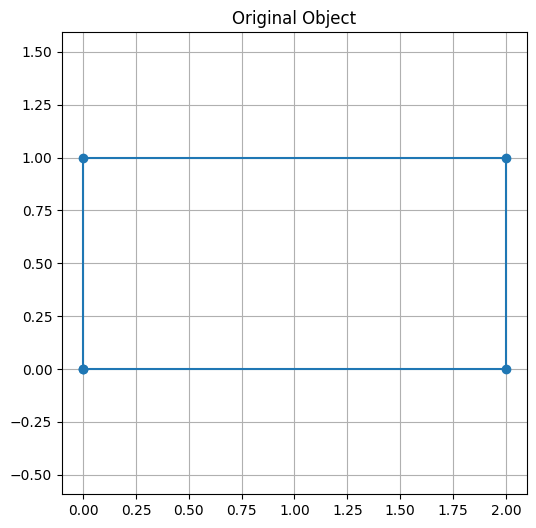

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
coords = np.array([
    [0, 0],
    [2, 0],
    [2, 1],
    [0, 1],
    [0, 0]
])

def plot_object(points, title="2D Object"):
    plt.figure(figsize=(6, 6))
    plt.plot(points[:, 0], points[:, 1], marker='o')
    plt.title(title)
    plt.grid()
    plt.axis('equal')
    plt.show()

def translate(points, dx, dy):
    matrix = np.array([[1, 0, dx],
                       [0, 1, dy],
                       [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed = points_h @ matrix.T
    return transformed[:, :2]

def scale(points, sx, sy):
    matrix = np.array([[sx, 0, 0],
                       [0, sy, 0],
                       [0, 0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed = points_h @ matrix.T
    return transformed[:, :2]

def rotate(points, angle):
    rad = np.radians(angle)
    matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                       [np.sin(rad),  np.cos(rad), 0],
                       [0,            0,           1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed = points_h @ matrix.T
    return transformed[:, :2]


def reflect(points, axis):
    if axis == 'x':
        matrix = np.array([[1,  0, 0],
                           [0, -1, 0],
                           [0,  0, 1]])
    elif axis == 'y':
        matrix = np.array([[-1, 0, 0],
                           [0,  1, 0],
                           [0,  0, 1]])
    elif axis == 'xy':
        matrix = np.array([[-1, 0, 0],
                           [0, -1, 0],
                           [0,  0, 1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed = points_h @ matrix.T
    return transformed[:, :2]


def shear(points, shx=0, shy=0):
    matrix = np.array([[1, shx, 0],
                       [shy, 1,  0],
                       [0,  0,  1]])
    points_h = np.hstack((points, np.ones((points.shape[0], 1))))
    transformed = points_h @ matrix.T
    return transformed[:, :2]


def apply_composite(points, transformations):
    result = points
    for transform in transformations:
        result = transform(result)
    return result


plot_object(coords, "Original Object")





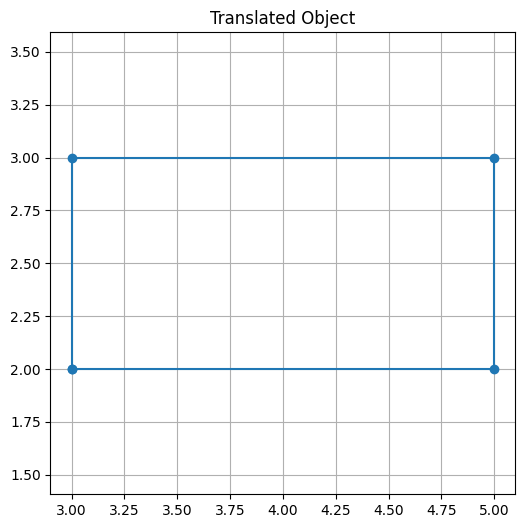

In [ ]:
translated_coords = translate(coords, 3, 2)
plot_object(translated_coords, "Translated Object")



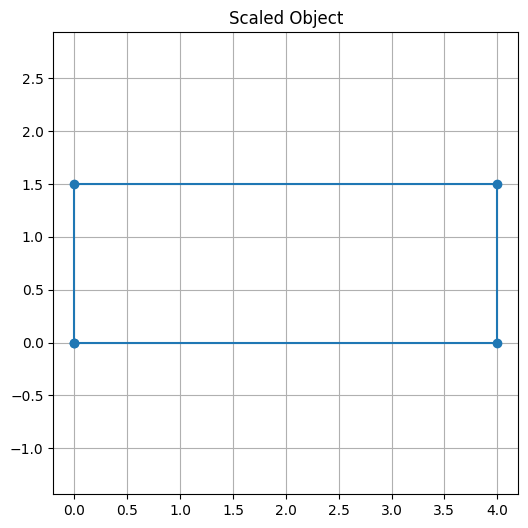

In [ ]:
scaled_coords = scale(coords, 2, 1.5)
plot_object(scaled_coords, "Scaled Object")

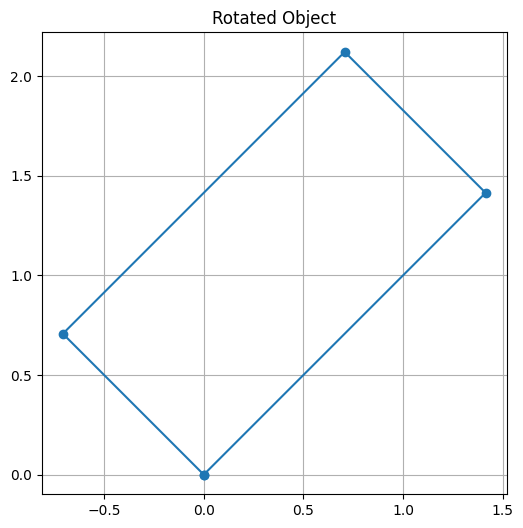

In [ ]:
rotated_coords = rotate(coords, 45)
plot_object(rotated_coords, "Rotated Object")

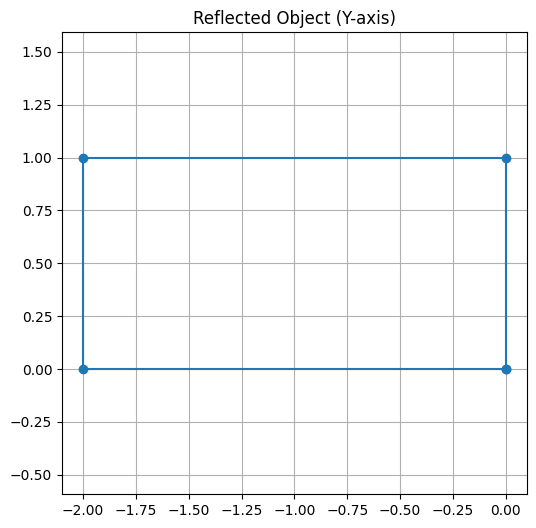

In [ ]:

reflected_coords = reflect(coords, axis='y')
plot_object(reflected_coords, "Reflected Object (Y-axis)")

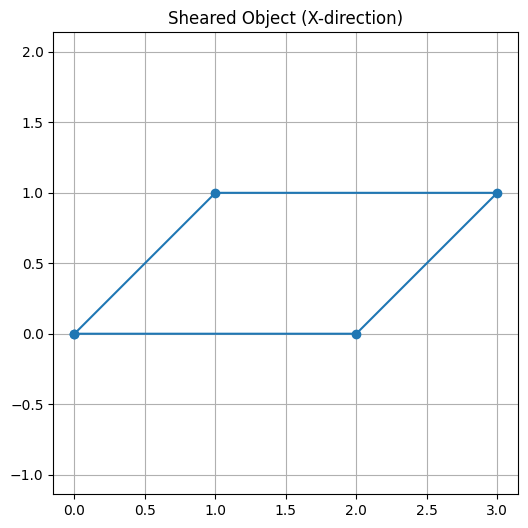

In [ ]:

sheared_coords = shear(coords, shx=1)
plot_object(sheared_coords, "Sheared Object (X-direction)")

**TASK 2**

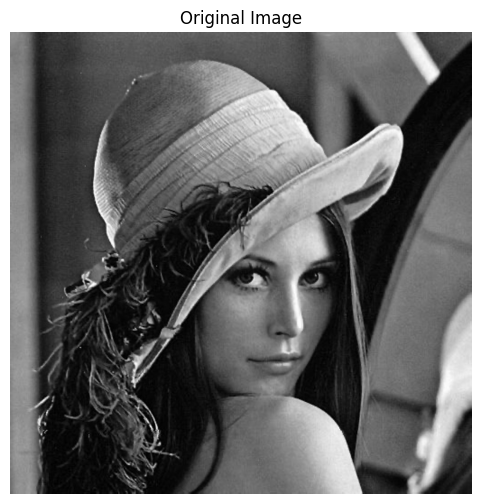

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mg = cv2.imread('Hii.jpg', cv2.IMREAD_GRAYSCALE)

def show_img(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


def translate_img(image, x_shift, y_shift):
    rows, cols, _ = image.shape
    matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    return cv2.warpAffine(image, matrix, (cols, rows))


def reflect_img(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)
    elif axis == 'xy':
        return cv2.flip(image, -1)


def rotate_img(image, angle):
    rows, cols, _ = image.shape
    center = (cols // 2, rows // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(image, matrix, (cols, rows))


def scale_img(image, x_scale, y_scale):
    return cv2.resize(image, None, fx=x_scale, fy=y_scale, interpolation=cv2.INTER_LINEAR)


def crop_img(image, top, left, bottom, right):
    return image[top:bottom, left:right]


def shear_img(image, shear_x=0, shear_y=0):
    rows, cols, _ = image.shape
    matrix = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
    return cv2.warpAffine(image, matrix, (cols, rows))


show_img(img, "Original Image")




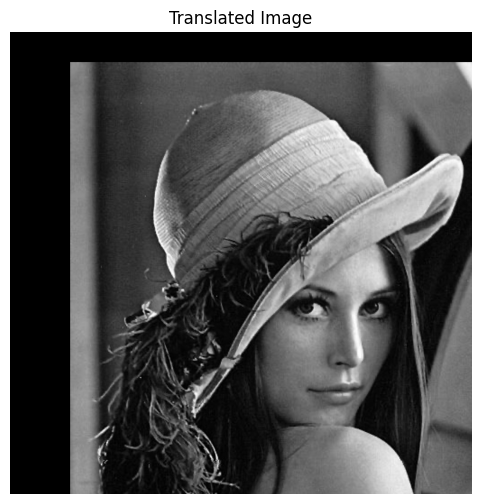

In [ ]:

translated = translate_img(img, 100, 50)
show_img(translated, "Translated Image")



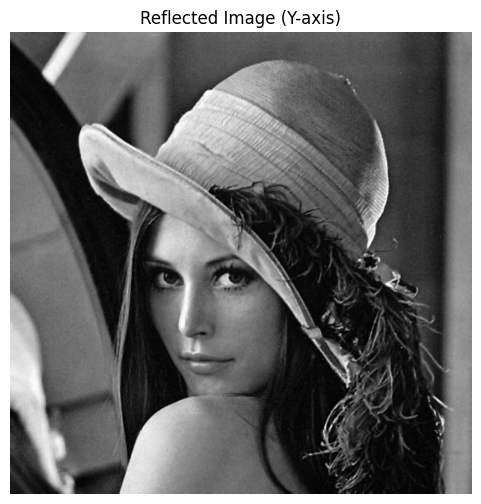

In [ ]:
reflected = reflect_img(img, 'y')
show_img(reflected, "Reflected Image (Y-axis)")



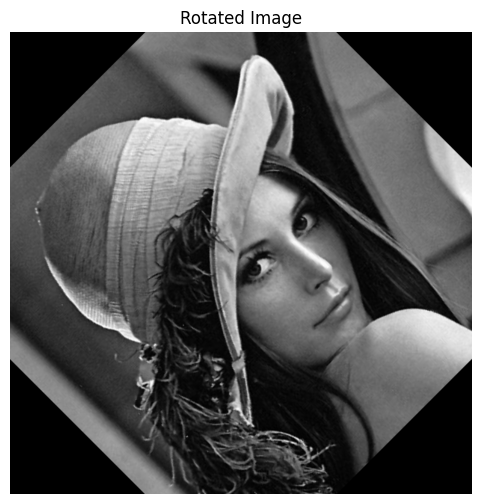

In [ ]:
rotated = rotate_img(img, 45)
show_img(rotated, "Rotated Image")



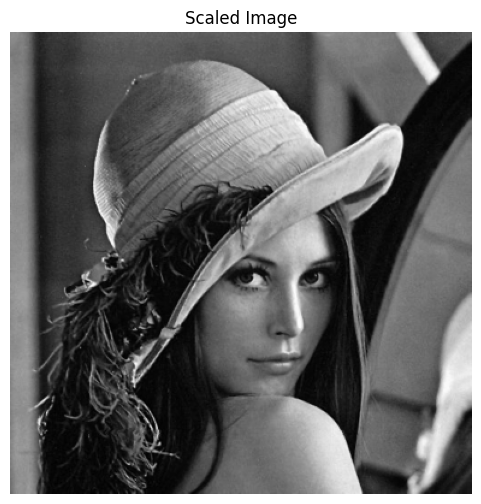

In [ ]:
scaled = scale_img(img, 0.5, 0.5)
show_img(scaled, "Scaled Image")



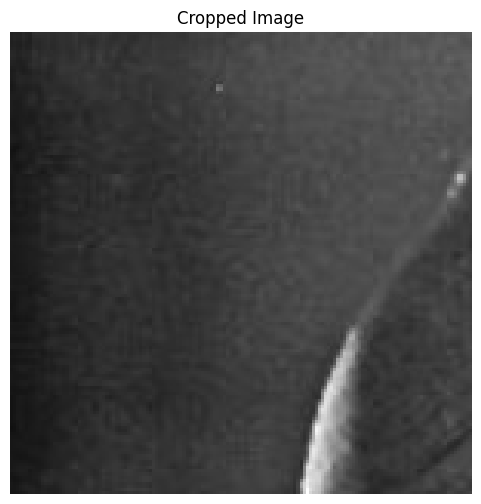

In [ ]:
cropped = crop_img(img, 50, 50, 200, 200)
show_img(cropped, "Cropped Image")



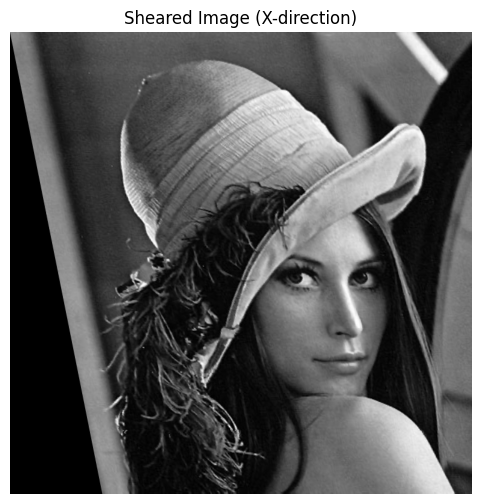

In [ ]:
sheared = shear_img(img, shear_x=0.2)
show_img(sheared, "Sheared Image (X-direction)")